In [67]:
from IPython.display import HTML 
s="""<h1>2D versus 3D Navier-Stokes for Flow in a Cavity</h1></br><div id="toc"></div>
<script src="https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js" defer></script>""";
h=HTML(s); h

***
# Understand the Problem

## Question

* What is the 3D velocity **and** pressure field for the **3D Navier Stokes Equation** for flow over a cavity?

## Initial Conditions

* The velocity and pressure fields are zero everywhere

## Boundary Conditions

Dimensionless form:

* The u-boundary condition at y=1 is 1 (the lid) 

* The other velocity boundary conditions are zero (no slip). 

* The p-boundary condition at y=1 is 0 (atmospheric pressure)

* The gradient of pressure at y=0, x=0, x=1, z=0 and z=1 is zero (Neumann)

* Density = 1

* Viscosity = 1/Re = 1/100

## Governing Equations

* The Navier Stokes Momentum Equation is described as follows:

$$ {\partial u \over \partial t} + u {\partial u \over \partial x} + v {\partial u \over \partial y} + w {\partial u \over \partial y} = -{1 \over \rho} {{\partial p} \over {\partial x}} + \nu \left ( {\partial^2 u \over \partial x^2}+  {\partial^2 u \over \partial y^2} + {\partial^2 w \over \partial z^2} \right ) $$

$$ {\partial v \over \partial t} + u {\partial v \over \partial x} + v {\partial v \over \partial y} + w {\partial v \over \partial z} = -{1 \over \rho} {{\partial p} \over {\partial y}} + \nu \left ( {\partial^2 v \over \partial x^2}+  {\partial^2 v \over \partial y^2} + {\partial^2 w \over \partial z^2} \right ) $$

$$ {\partial w \over \partial t} + u {\partial w \over \partial x} + v {\partial w \over \partial y} + w {\partial w \over \partial z} = -{1 \over \rho} {{\partial p} \over {\partial z}} + \nu \left ( {\partial^2 w \over \partial x^2} + {\partial^2 w \over \partial y^2} + {\partial^2 w \over \partial z^2} \right ) $$

* The Poisson Equation to link pressure and velocity is:

$$ \nabla^2 p^{n+1} = \rho {{\nabla \cdot \mathbf{u}^n} \over {\Delta t}}-
   \rho \nabla \cdot (\mathbf{u}^n \cdot \nabla \mathbf{u}^n)+
   \mu \nabla^2 (\nabla \cdot \mathbf{u}^n)
$$

* **Assuming viscosity is small**, the Poisson Equation to link pressure and velocity is as follows:

$$ {{\partial^2 p} \over {\partial x^2}} + {{\partial^2 p} \over {\partial y^2}} + {{\partial^2 p} \over {\partial z^2}} =
{\rho \over \Delta t} \left( {{\partial u} \over {\partial x}} + {{\partial v} \over {\partial y}} + {{\partial w} \over {\partial z}} \right)
- \rho \left[ \left( {{\partial u} \over {\partial x}} \right)^2 + 
\left( {{\partial v} \over {\partial y}} \right)^2 +
\left( {{\partial w} \over {\partial z}} \right)^2 +
2 \left( {{\partial u} \over {\partial y}} {{\partial v} \over {\partial x}} +  
{{\partial w} \over {\partial x}} {{\partial u} \over {\partial z}} +
{{\partial w} \over {\partial y}} {{\partial v} \over {\partial z}}
\right) \right] $$

(this equation applies in the discrete domain)

***

# Formulate the Problem

## Input Data:

The Poisson Equation has **no temporal component**, so we use a number of iterations `niter`

The Navier Stokes Momentum Equation **does have a temporal component**, so we use `nt`

* `niter` = 51 (maximum number of iterations - for Poisson Equation)
* `nt` = 51 (number of temporal points)
* `nx` = 129 (number of x spatial points - maybe initially try 21)
* `ny` = 129 (number of y spatial points - maybe initially try 21)
* `nz` = 129 (number of z spatial points - maybe initially try 21)
* `tmax` = 6 (maybe initially try 0.1)
* `xmax` = 1
* `ymax` = 1
* `zmax` = 1
* `nu` = 1/100
* `rho` = 1

## Initial Conditions:

* $\forall (n, x, y, z) \quad n = 0 \rightarrow u = 0 \land v = 0 \land w = 0 \land p = 0$

## Velocity Boundary Conditions:

* $\forall (n, x, y, z) \quad y = 1 \rightarrow u = 1$

* $\forall (n, x, y, z) \quad x = 0 \lor x = 1 \lor y = 0 \lor z = 0 \lor z = 1 \rightarrow u = 0$

* $\forall (n, x, y, z) \quad x = 0 \lor x = 1 \lor y = 0 \lor y = 1 \lor z = 0 \lor z = 1  \rightarrow v = 0$

* $\forall (n, x, y, z) \quad x = 0 \lor x = 1 \lor y = 0 \lor y = 1 \lor z = 0 \lor z = 1  \rightarrow w = 0$

## Pressure Boundary Conditions:

* $\forall (n, x, y, z) \quad y = 1 \rightarrow p = 0$

* $\forall (n, x, y, z) \quad y = 0 \rightarrow {{\partial p} \over {\partial y}} = 0$

* $\forall (n, x, y, z) \quad x = 0 \lor x = 1 \lor z = 0 \lor z = 1 \rightarrow {{\partial p} \over {\partial x}} = 0$

* $\forall (n, x, y, z) \quad x = 0 \lor x = 1 \lor z = 0 \lor z = 1 \rightarrow {{\partial p} \over {\partial z}} = 0$

## Output Data:

* $\forall (n,x,y,z) \quad \ p = ? \land u = ? \land v = ? \land w = ?$

***

# Design Algorithm to Solve Problem

## Space-time discretisation:

* i $\rightarrow$ index of grid in x
* j $\rightarrow$ index of grid in y
* k $\rightarrow$ index of grid in z
* n $\rightarrow$ index of time
* m $\rightarrow$ index of iterations

## Numerical schemes for each Momentum Equation

* For the **one** first derivative of velocity in time: 1st order FD in time
* For the **three** first derivatives of velocity in space: 1st order BD in space
* For the **one** first derivative of pressure in space: 2nd order CD in space
* For the **three** second derivatives of velocity in space: 2nd order CD in space

## Numerical schemes for the Poisson Equation

* For the **two** second derivatives of pressure in space: 2nd order CD in space
* The the **three** first derivatives of velocity in space: 2nd order CD in space

## Discrete equation for u-Momentum Equation

$$ {{u_{i,j,k}^{n+1} - u_{i,j,k}^n} \over {\Delta t}} + 
   u_{i,j,k}^n {{u_{i,j,k}^n - u_{i-1,j,k}^n} \over \Delta x} + 
   v_{i,j,k}^n {{u_{i,j,k}^n - u_{i,j-1,k}^n} \over \Delta y} +
   w_{i,j,k}^n {{u_{i,j,k}^n - u_{i,j,k-1}^n} \over \Delta z}
   = \\
   -{1 \over \rho} {{p_{i+1,j,k}^n - p_{i-1,j,k}^n} \over {2 \Delta x}} +
   \nu {{u_{i-1,j,k}^n - 2u_{i,j,k}^n + u_{i+1,j,k}^n} \over \Delta x^2} + 
   \nu {{u_{i,j-1,k}^n - 2u_{i,j,k}^n + u_{i,j+1,k}^n} \over \Delta y^2} +
   \nu {{u_{i,j,k-1}^n - 2u_{i,j,k}^n + u_{i,j,k+1}^n} \over \Delta z^2}
$$

## Transpose

Assume $ \Delta x = \Delta y = h$

$$ u_{i,j,k}^{n+1} = u_{i,j,k}^n - \\
{{\Delta t} \over h} \left[ u_{i,j,k}^n(u_{i,j,k}^n - u_{i-1,j,k}^n) + v_{i,j,k}^n(u_{i,j,k}^n - u_{i,j-1,k}^n) + w_{i,j,k}^n(u_{i,j,k}^n - u_{i,j,k-1}^n) \right] - \\
{{\Delta t} \over {2 \rho h}} (p_{i+1,j,k}^n - p_{i-1,j,k}^n) + {{\Delta t \nu} \over {h^2}}
(u_{i-1,j,k}^n + u_{i+1,j,k}^n + u_{i,j-1,k}^n + u_{i,j+1,k}^n + u_{i,j,k-1}^n + u_{i,j,k+1}^n - 6 u_{i,j,k}^n )
$$

## Discrete equation for v-Momentum Equation

Similarly for v-momentum:

$$ v_{i,j,k}^{n+1} = v_{i,j,k}^n - \\
{{\Delta t} \over h} \left[ u_{i,j,k}^n(v_{i,j,k}^n - v_{i-1,j,k}^n) + v_{i,j,k}^n(v_{i,j,k}^n - v_{i,j-1,k}^n) + w_{i,j,k}^n(v_{i,j,k}^n - v_{i,j,k-1}^n) \right] - \\
{{\Delta t} \over {2 \rho h}} (p_{i,j+1,k}^n - p_{i,j-1,k}^n) + {{\Delta t \nu} \over {h^2}}
(v_{i-1,j,k}^n + v_{i+1,j,k}^n + v_{i,j-1,k}^n + v_{i,j+1,k}^n + v_{i,j,k-1}^n + v_{i,j,k+1}^n - 6 v_{i,j,k}^n )
$$

## Discrete equation for w-Momentum Equation

Similarly for w-momentum:

$$ w_{i,j,k}^{n+1} = w_{i,j,k}^n - \\
{{\Delta t} \over h} \left[ u_{i,j,k}^n(w_{i,j,k}^n - w_{i-1,j,k}^n) + v_{i,j,k}^n(w_{i,j,k}^n - w_{i,j-1,k}^n) + w_{i,j,k}^n(w_{i,j,k}^n - w_{i,j,k-1}^n) \right] - \\
{{\Delta t} \over {2 \rho h}} (p_{i,j,k+1}^n - p_{i,j,k-1}^n) + {{\Delta t \nu} \over {h^2}}
(w_{i-1,j,k}^n + w_{i+1,j,k}^n + w_{i,j-1,k}^n + w_{i,j+1,k}^n + w_{i,j,k-1}^n + w_{i,j,k+1}^n - 6 w_{i,j,k}^n )
$$

## Discrete equation for Poisson Equation must be Divergence Free

Since no terms have a differential temporal component - bring source term to other side and equate to forward differencing (as we did for Laplace Equation). Then take steady state after a certain number of iterations.

$$ {{\partial^2 p} \over {\partial x^2}} + {{\partial^2 p} \over {\partial y^2}} + {{\partial^2 p} \over {\partial z^2}} =
{\rho \over \Delta t} \left( {{\partial u} \over {\partial x}} + {{\partial v} \over {\partial y}} + {{\partial w} \over {\partial z}} \right)
- \rho \left[ \left( {{\partial u} \over {\partial x}} \right)^2 + 
\left( {{\partial v} \over {\partial y}} \right)^2 +
\left( {{\partial w} \over {\partial z}} \right)^2 + 
2 \left( {{\partial u} \over {\partial y}} {{\partial v} \over {\partial x}} +  
{{\partial w} \over {\partial x}} {{\partial u} \over {\partial z}} +
{{\partial w} \over {\partial y}} {{\partial v} \over {\partial z}}
\right) \right] $$


$$ {{\partial p} \over {\partial t}} = {{\partial^2 p} \over {\partial x^2}} + {{\partial^2 p} \over {\partial y^2}} + {{\partial^2 p} \over {\partial z^2}} \\ -  
\left[ {\rho \over \Delta t} \left( {{\partial u} \over {\partial x}} + {{\partial v} \over {\partial y}} + {{\partial w} \over {\partial z}} \right) 
- \rho \left[ \left( {{\partial u} \over {\partial x}} \right)^2 + 
\left( {{\partial v} \over {\partial y}} \right)^2 +
\left( {{\partial w} \over {\partial z}} \right)^2 + 
2 \left( {{\partial u} \over {\partial y}} {{\partial v} \over {\partial x}} +  
{{\partial w} \over {\partial x}} {{\partial u} \over {\partial z}} +
{{\partial w} \over {\partial y}} {{\partial v} \over {\partial z}}
\right) \right] \right] $$

$$ {{\partial p} \over {\partial t}} = {{\partial^2 p} \over {\partial x^2}} + {{\partial^2 p} \over {\partial y^2}} + {{\partial^2 p} \over {\partial z^2}} - 
b $$

$$ {{p_{i,j,k}^{m+1}-p_{i,j,k}^m} \over {\Delta \tau}} = {{p_{i+1,j,k}^m -2p_{i,j,k}^m + p_{i-1,j,k}^m} \over \Delta x^2} + {{p_{i,j+1,k}^m -2p_{i,j,k}^m + p_{i,j-1,k}^m} \over \Delta y^2} + {{p_{i,j,k+1}^m -2p_{i,j,k}^m + p_{i,j,k-1}^m} \over \Delta z^2}- b_{i,j,k}^m $$

Assume that $ \Delta x = \Delta y = \Delta z = h $

$$ {{p_{i,j,k}^{m+1}-p_{i,j,k}^m} \over {\Delta \tau}} = {{p_{i+1,j,k}^m -2p_{i,j,k}^m + p_{i-1,j,k}^m} \over h^2} + {{p_{i,j+1,k}^m -2p_{i,j,k}^m + p_{i,j-1,k}^m} \over h^2} + {{p_{i,j,k+1}^m -2p_{i,j,k}^m + p_{i,j,k-1}^m} \over h^2}- b_{i,j,k}^m $$


$$ p_{i,j,k}^{m+1} = p_{i,j,k}^m + {{\Delta \tau} \over {h^2}} \left( 
p_{i+1,j,k}^m + p_{i-1,j,k}^m + p_{i,j+1,k}^m + p_{i,j-1,k}^m + p_{i,j,k+1}^m + p_{i,j,k-1}^m - 6p_{i,j,k}^m \right) - b_{i,j,k}^m \Delta \tau $$

Based on Point Jacobi intuition: $ r = {{\Delta \tau} \over {h^2}} = {1 \over 6} $ and $ \Delta \tau = {{h^2} \over 6} $

Hence:

$$ p_{i,j,k}^{m+1} = {1 \over 6} \left( p_{i+1,j,k}^m + p_{i-1,j,k}^m + p_{i,j+1,k}^m + p_{i,j-1,k}^m + p_{i,j,k+1}^m + p_{i,j,k-1}^m - b_{i,j,k}^m h^2 \right) $$

So now we need to define $ b_{i,j,k}^m $

$$
b = \left[ {\rho \over \Delta t} \left( {{\partial u} \over {\partial x}} + {{\partial v} \over {\partial y}} + {{\partial w} \over {\partial z}} \right) 
- \rho \left[ \left( {{\partial u} \over {\partial x}} \right)^2 + 
\left( {{\partial v} \over {\partial y}} \right)^2 +
\left( {{\partial w} \over {\partial z}} \right)^2 + 
2 \left( {{\partial u} \over {\partial y}} {{\partial v} \over {\partial x}} +  
{{\partial w} \over {\partial x}} {{\partial u} \over {\partial z}} +
{{\partial w} \over {\partial y}} {{\partial v} \over {\partial z}}
\right) \right] \right]
$$



$$ b_{i,j,k}^{m} = 
{\rho \over \Delta t} \left( {{u_{i+1,j,k}^n - u_{i-1,j,k}^n} \over {2 \Delta x}} + {{v_{i,j+1,k}^n - v_{i,j-1,k}^n} \over {2 \Delta y}} +  {{w_{i,j,k+1}^n - w_{i,j,k-1}^n} \over {2 \Delta z}}  \right) -
\rho \left[ \left( {{u_{i+1,j,k}^n - u_{i-1,j,k}^n} \over {2 \Delta x}} \right)^2 + 
\left( {{v_{i,j+1,k}^n - v_{i,j-1,k}^n} \over {2 \Delta y}} \right)^2 +
\left( {{w_{i,j,k+1}^n - w_{i,j,k-1}^n} \over {2 \Delta z}} \right)^2 + \\
2 \left( 
{{u_{i,j+1,k}^n - u_{i,j-1,k}^n} \over {2 \Delta y}} {{v_{i+1,j,k}^n - v_{i-1,j,k}^n} \over {2 \Delta x}} +
{{w_{i+1,j,k}^n - w_{i-1,j,k}^n} \over {2 \Delta x}} {{u_{i,j,k+1}^n - u_{i,j,k-1}^n} \over {2 \Delta z}} +
{{w_{i,j+1,k}^n - w_{i,j-1,k}^n} \over {2 \Delta y}} {{v_{i,j,k+1}^n - v_{i,j,k-1}^n} \over {2 \Delta z}}
\right) \right] $$

Also assume that $ \Delta x = \Delta y = \Delta z = h $


$$ b_{i,j,k}^{m} = 
{\rho \over {2 h \Delta t}} ( {{u_{i+1,j,k}^n - u_{i-1,j,k}^n}} + {{v_{i,j+1,k}^n - v_{i,j-1,k}^n}} + {{w_{i,j,k+1}^n - w_{i,j,k-1}^n}} ) -
{\rho \over {4h^2}} \left[ (u_{i+1,j,k}^n - u_{i-1,j,k}^n)^2 + (v_{i,j+1,k}^n - v_{i,j-1,k}^n)^2 + (w_{i,j,k+1}^n - w_{i,j,k-1}^n)^2 \\
+ 2 \left(( u_{i,j+1,k}^n - u_{i,j-1,k}^n) (v_{i+1,j,k}^n - v_{i-1,j,k}^n) +
( w_{i+1,j,k}^n - w_{i-1,j,k}^n) (u_{i,j,k+1}^n - u_{i,j,k-1}^n) +
( w_{i,j+1,k}^n - w_{i,j-1,k}^n) (v_{i,j,k+1}^n - v_{i,j,k-1}^n)
\right) \right] $$

## Navier Stokes Equations - slice notation

In [43]:
def navier_stokes_initialisation_3d(niter, r, nx_or_ny_or_nz, tmax, xmax_or_ymax_or_zmax):
    """
    Returns the velocity field and distance for 2D linear convection
    """
    # Increments:
    nx = ny = nz = nx_or_ny_or_nz
    xmax = ymax = zmax = xmax_or_ymax_or_zmax
    dx = xmax/(nx-1)
    dy = ymax/(ny-1)
    dz = zmax/(nz-1)
    nt = int((tmax / (r*(dx)**2))+1)
    dt = tmax/(nt-1)
    
    # Initialise data structures:
    import numpy as np
    p = np.zeros((nx,ny,nz))
    u = np.zeros((nx,ny,nz))
    v = np.zeros((nx,ny,nz))
    w = np.zeros((nx,ny,nz))
    
    # linspace is SIMPLER than list comprehensions:
    x = np.linspace(0.0,1.0,nx)
    y = np.linspace(0.0,1.0,ny)
    z = np.linspace(0.0,1.0,nz)
    
    # Pressure Boundary Conditions:
    p[:,ny-1,:] = 0.0
    
    # Velocity Boundary Conditions:
    u[:,ny-1,:] = 1.0
        
    return p, x, y, z, u, v, w, nx, ny, nz, nt, dx, dy, dz, dt, niter, r

In [44]:
def navier_stokes_3d(rho, nu, niter, r, nx, tmax, xmax):
                  
    (p, x, y, z, u, v, w, nx, ny, nz, 
     nt, dx, dy, dz, dt, niter, r) = navier_stokes_initialisation_3d(niter, r, nx, tmax, xmax)
    
    # Increments
    h = dx
    error_target = 1.0e-2
    import numpy as np
    
    # Intermediate copies:
    un = np.zeros((nx, ny, nz))
    vn = np.zeros((nx, ny, nz))
    wn = np.zeros((nx, ny, nz))
    pm = np.zeros((nx, ny, nz))
    bm = np.zeros((nx, ny, nz)) # bm needs to be exactly zero at the boundaries
        
    # Loop - use decimal points for all floating point numbers
    for n in range(nt):    
        
        # We know the velocity at i=0, j=0, k=0, i=nx-1, j=ny-1, k=nz-1. b is zero at the boundaries.  
        bm[1:-1, 1:-1, 1:-1] =  ( (rho / (2.0 * h * dt)) * ( u[2:, 1:-1, 1:-1] - u[0:-2, 1:-1, 1:-1] 
                                                    + v[1:-1, 2:, 1:-1] - v[1:-1, 0:-2, 1:-1] 
                                                    + w[1:-1, 1:-1, 2:] - w[1:-1, 1:-1, 0:-2]) -
            (rho / (4.0*h**2)) * ( (u[2:, 1:-1, 1:-1] - u[0:-2, 1:-1, 1:-1])**2.0 +
                                   (v[1:-1, 2:, 1:-1] - v[1:-1, 0:-2, 1:-1])**2.0 +
                                   (w[1:-1, 1:-1, 2:] - w[1:-1, 1:-1, 0:-2])**2.0 +
                               2.0*((u[1:-1, 2:, 1:-1] - u[1:-1, 0:-2, 1:-1])*(v[2:, 1:-1, 1:-1] - v[0:-2, 1:-1, 1:-1]) +
                                    (w[2:, 1:-1, 1:-1] - w[0:-2, 1:-1, 1:-1])*(u[1:-1, 1:-1, 2:] - u[1:-1, 1:-1, 0:-2]) +
                                    (w[1:-1, 2:, 1:-1] - w[1:-1, 0:-2, 1:-1])*(v[1:-1, 1:-1, 2:] - v[1:-1, 1:-1, 0:-2])) ))
        
        # First points for p. We don't know the pressure at i=0, j=0 and i=nx-1. We DO know the pressure at j=ny-1        
        while True: 
            for m in range(niter):
                pm = np.copy(p)
                p[1:-1, 1:-1, 1:-1] = (1.0/6.0)*( pm[2:, 1:-1, 1:-1] + pm[0:-2, 1:-1, 1:-1] + 
                                                  pm[1:-1, 2:, 1:-1] + pm[1:-1, 0:-2, 1:-1] +
                                                  pm[1:-1, 1:-1, 2:] + pm[1:-1, 1:-1, 0:-2] - 
                                                  bm[1:-1, 1:-1, 1:-1]*h**2.0 )
            
                # Set zero gradient boundary conditions:
                p[0, :, :] = p[1, :, :]
                p[-1, :, :] = p[-2, :, :]
                p[:, 0, :] = p[:, 1, :]
                p[:, :, 0] = p[:, :, 1]
                p[:, :, -1] = p[:, :, -2]
            
                error = np.abs(np.sum(np.abs(p[1:-1, 1:-1, 1:-1])-np.abs(pm[1:-1, 1:-1, 1:-1])))
        
                if(error < error_target):
                    #print "n = " + str(m) + " completed"
                    break
            break
        
        # First points for u and v. We know the velocity at i=0, j=0, i=nx-1 and j=ny-1.
        # We are simply using the value of pressure here
        un = np.copy(u)
        vn = np.copy(v)
        wn = np.copy(w)
        
        u[1:-1, 1:-1, 1:-1] = ( un[1:-1, 1:-1, 1:-1] - 
                 (dt / h) * ( un[1:-1, 1:-1, 1:-1] * ( un[1:-1, 1:-1, 1:-1] - un[0:-2, 1:-1, 1:-1] ) + 
                              vn[1:-1, 1:-1, 1:-1] * ( un[1:-1, 1:-1, 1:-1] - un[1:-1, 0:-2, 1:-1] ) +
                              wn[1:-1, 1:-1, 1:-1] * ( un[1:-1, 1:-1, 1:-1] - un[1:-1, 1:-1, 0:-2] ) ) - 
        (dt / (2.0 * rho * h)) * ( p[2:, 1:-1, 1:-1] - p[0:-2, 1:-1, 1:-1] ) + 
        (dt * nu / h**2.0) * ( un[0:-2, 1:-1, 1:-1] + un[2:, 1:-1, 1:-1] + 
                               un[1:-1, 0:-2, 1:-1] + un[1:-1, 2:, 1:-1] +
                               un[1:-1, 1:-1, 0:-2] + un[1:-1, 1:-1, 2:] ) )
        
        v[1:-1, 1:-1, 1:-1] = ( vn[1:-1, 1:-1, 1:-1] - 
                 (dt / h) * ( un[1:-1, 1:-1, 1:-1] * ( vn[1:-1, 1:-1, 1:-1] - vn[0:-2, 1:-1, 1:-1] ) + 
                              vn[1:-1, 1:-1, 1:-1] * ( vn[1:-1, 1:-1, 1:-1] - vn[1:-1, 0:-2, 1:-1] ) +
                              wn[1:-1, 1:-1, 1:-1] * ( vn[1:-1, 1:-1, 1:-1] - vn[1:-1, 1:-1, 0:-2] ) ) - 
        (dt / (2.0 * rho * h)) * ( p[1:-1, 2:, 1:-1] - p[1:-1, 0:-2, 1:-1] ) + 
        (dt * nu / h**2.0) * ( vn[0:-2, 1:-1, 1:-1] + vn[2:, 1:-1, 1:-1] + 
                               vn[1:-1, 0:-2, 1:-1] + vn[1:-1, 2:, 1:-1] +
                               vn[1:-1, 1:-1, 0:-2] + vn[1:-1, 1:-1, 2:] ) )
        
        w[1:-1, 1:-1, 1:-1] = ( wn[1:-1, 1:-1, 1:-1] - 
                 (dt / h) * ( un[1:-1, 1:-1, 1:-1] * ( wn[1:-1, 1:-1, 1:-1] - wn[0:-2, 1:-1, 1:-1] ) + 
                              vn[1:-1, 1:-1, 1:-1] * ( wn[1:-1, 1:-1, 1:-1] - wn[1:-1, 0:-2, 1:-1] ) +
                              wn[1:-1, 1:-1, 1:-1] * ( wn[1:-1, 1:-1, 1:-1] - wn[1:-1, 1:-1, 0:-2] ) ) - 
        (dt / (2.0 * rho * h)) * ( p[1:-1, 1:-1, 2:] - p[1:-1, 1:-1, 0:-2] ) + 
        (dt * nu / h**2.0) * ( wn[0:-2, 1:-1, 1:-1] + wn[2:, 1:-1, 1:-1] + 
                               wn[1:-1, 0:-2, 1:-1] + wn[1:-1, 2:, 1:-1] +
                               wn[1:-1, 1:-1, 0:-2] + wn[1:-1, 1:-1, 2:] ) )             
    
    return u, v, w, p, x, y, z

In [45]:
def navier_stokes_initialisation_2d(niter, r, nx_or_ny, tmax, xmax_or_ymax):
    """
    Returns the velocity field and distance for 2D linear convection
    """
    # Increments:
    nx = ny = nx_or_ny
    xmax = ymax = xmax_or_ymax
    dx = xmax/(nx-1)
    dy = ymax/(ny-1)
    nt = int((tmax / (r*(dx)**2))+1)
    dt = tmax/(nt-1)
    
    # Initialise data structures:
    import numpy as np
    p = np.zeros((nx,ny))
    u = np.zeros((nx,ny))
    v = np.zeros((nx,ny))
    
    # linspace is SIMPLER than list comprehensions:
    x = np.linspace(0.0,1.0,nx)
    y = np.linspace(0.0,1.0,ny)
    
    # Pressure Boundary Conditions:
    p[:, ny-1] = 0.0
    
    # Velocity Boundary Conditions:
    u[:,ny-1] = 1.0
        
    return p, x, y, u, v, nx, ny, nt, dx, dy, dt, niter, r

In [46]:
def navier_stokes_2d(rho, nu, niter, r, nx, tmax, xmax):
                  
    (p, x, y, u, v, nx, ny, nt, 
    dx, dy, dt, niter, r) = navier_stokes_initialisation_2d(niter, r, nx, tmax, xmax)
    
    # Increments
    h = dx
    error_target = 1.0e-2
    import numpy as np
    
    # Intermediate copies:
    un = np.zeros((nx, ny))
    vn = np.zeros((nx, ny))
    pm = np.zeros((nx, ny))
    bm = np.zeros((nx, ny)) # bm needs to be exactly zero at the boundaries
        
    # Loop - use decimal points for all floating point numbers
    for n in range(nt):    
        
        # We know the velocity at i=0, j=0, i=nx-1 and j=ny-1. b is zero at the boundaries.  
        bm[1:-1, 1:-1] = ( (rho / (2.0 * h * dt)) * ( u[2:, 1:-1] - u[0:-2, 1:-1] 
                                                    + v[1:-1, 2:] - v[1:-1, 0:-2] ) -
            (rho / (4.0*h**2)) * ( (u[2:, 1:-1] - u[0:-2, 1:-1])**2.0 + 
                             2.0*(u[1:-1, 2:] - u[1:-1, 0:-2])*(v[2:, 1:-1] - v[0:-2, 1:-1]) + 
                                   (v[1:-1, 2:] - v[1:-1, 0:-2])**2.0 ) )
        
        # First points for p. We don't know the pressure at i=0, j=0 and i=nx-1. We DO know the pressure at j=ny-1
    
        while True: 
            for m in range(niter):
                pm = np.copy(p)
                p[1:-1, 1:-1] = 0.25*( pm[2:, 1:-1] + pm[0:-2, 1:-1] + pm[1:-1, 2:] + pm[1:-1, 0:-2]
                                 - bm[1:-1, 1:-1]*h**2.0 )
            
                # Set zero gradient boundary conditions:
                p[0, :] = p[1, :]
                p[:, 0] = p[:, 1]
                p[-1, :] = p[-2, :]
            
                error = np.abs(np.sum(np.abs(p[1:-1, 1:-1])-np.abs(pm[1:-1, 1:-1])))
        
                if(error < error_target):
                    #print "n = " + str(m) + " completed"
                    break
            break
            
        # First points for u and v. We know the velocity at i=0, j=0, i=nx-1 and j=ny-1.
        # We are simply using the value of pressure here
        un = np.copy(u)
        vn = np.copy(v)
              
        u[1:-1, 1:-1] = ( un[1:-1, 1:-1] - 
                 (dt / h) * ( un[1:-1, 1:-1] * ( un[1:-1, 1:-1] - un[0:-2, 1:-1] ) + 
                              vn[1:-1, 1:-1] * ( un[1:-1, 1:-1] - un[1:-1, 0:-2] ) ) - 
        (dt / (2.0 * rho * h)) * ( p[2:, 1:-1] - p[0:-2, 1:-1] ) + 
        (dt * nu / h**2.0) * ( un[0:-2, 1:-1] + un[2:, 1:-1] + un[1:-1, 0:-2] + un[1:-1, 2:] - 
                         4.0 * un[1:-1, 1:-1] ) ) 

        v[1:-1, 1:-1] = ( vn[1:-1, 1:-1] - 
                 (dt / h) * ( un[1:-1, 1:-1] * ( vn[1:-1, 1:-1] - vn[0:-2, 1:-1] ) + 
                              vn[1:-1, 1:-1] * ( vn[1:-1, 1:-1] - vn[1:-1, 0:-2] ) ) - 
        (dt / (2.0 * rho * h)) * ( p[1:-1, 2:] - p[1:-1, 0:-2] ) + 
        (dt * nu / h**2.0) * ( vn[0:-2, 1:-1] + vn[2:, 1:-1] + vn[1:-1, 0:-2] + vn[1:-1, 2:] -
                         4.0 * vn[1:-1, 1:-1] ) )          
    
    return u, v, p, x, y

In [ ]:
%timeit navier_stokes(1, 0.01, 50, 0.1, 21, 0.1, 1.0)

In [39]:
u00, v00, w00, p00, x00, y00, z00 = navier_stokes_3d(1, 0.01, 50, 0.1, 21, 0.1, 1.0)

In [47]:
u01, v01, p01, x01, y01 = navier_stokes_2d(1, 0.01, 50, 0.1, 21, 0.1, 1.0)

In [50]:
def vector_contour_3d(u, v, p, x, y):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    fig = plt.figure(figsize=(11,7), dpi=100)
    Y,X=np.meshgrid(y,x) #note meshgrid uses y,x not x,y!!!
    plt.contourf(X,Y,p[:,:,10],alpha=0.5)    ###plotting the pressure field as a contour
    plt.colorbar()
    plt.contour(X,Y,p[:,:,10])               ###plotting the pressure field outlines
    plt.quiver(X[::2,::2],Y[::2,::2],u[::2,::2,10],v[::2,::2,10]) ##plotting velocity
    plt.xlabel('X')
    plt.ylabel('Y')

In [48]:
def vector_contour_2d(u, v, p, x, y):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    fig = plt.figure(figsize=(11,7), dpi=100)
    Y,X=np.meshgrid(y,x) #note meshgrid uses y,x not x,y!!!
    plt.contourf(X,Y,p[:,:],alpha=0.5)    ###plotting the pressure field as a contour
    plt.colorbar()
    plt.contour(X,Y,p[:,:])               ###plotting the pressure field outlines
    plt.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2]) ##plotting velocity
    plt.xlabel('X')
    plt.ylabel('Y')

# Results

## 3D centreline 21 spatial intervals tmax = 0.1 seconds

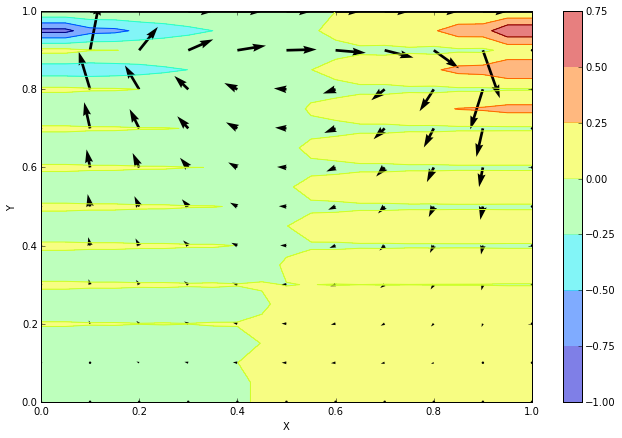

In [51]:
%matplotlib inline
vector_contour_3d(u00, v00, p00, x00, y00)

## 2D Centreline 21 spatial intervals tmax = 0.1 seconds

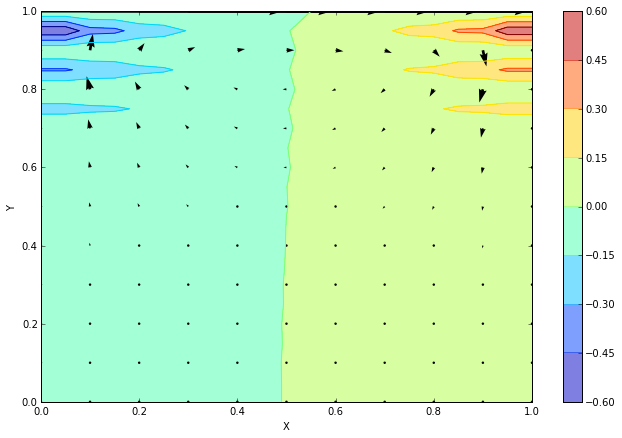

In [52]:
%matplotlib inline
vector_contour_2d(u01, v01, p01, x01, y01)

## What does the 2D and 3D velocity profile look like?

In [61]:
def plot_u_vs_y(u2d, u3d, y0):

   """
   Plots the 1D velocity field
   """
   import numpy as np
   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   u_vel = np.zeros((21,2))
   u_vel[:, 0] = u2d[10, :]
   u_vel[:, 1] = u3d[10, :, 10]
    
   plt.figure()
   ax=plt.subplot(111)
   ax.plot(y0,u_vel[:, 0],linestyle='-',c='k', label='t= 0.1 sec, 2d')
   ax.plot(y0,u_vel[:, 1],linestyle='-',c='r', label='t= 0.1 sec, 3d')
   box=ax.get_position()
   ax.set_position([box.x0, box.y0, box.width*2,box.height*2])
   ax.legend( bbox_to_anchor=(1.0,1.0), loc=2)
   plt.xlabel('y/L (-)')
   plt.ylabel('u/U (-)')
   plt.show()    

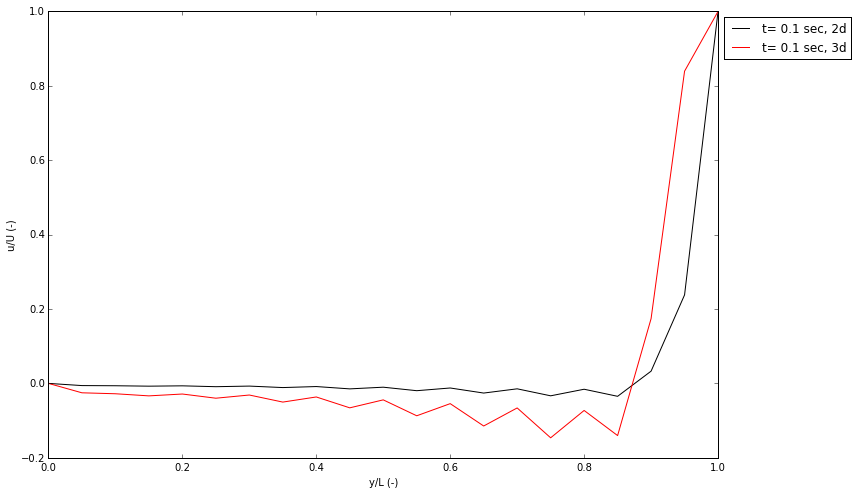

In [62]:
plot_u_vs_y(u01, u00, y00)

In [63]:
def plot_v_vs_x(u2d, u3d, y0):

   """
   Plots the 1D velocity field
   """
   import numpy as np
   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   u_vel = np.zeros((21,2))
   u_vel[:, 0] = u2d[:, 10]
   u_vel[:, 1] = u3d[:, 10, 10]
    
   plt.figure()
   ax=plt.subplot(111)
   ax.plot(y0,u_vel[:, 0],linestyle='-',c='k', label='t= 0.1 sec, 2d')
   ax.plot(y0,u_vel[:, 1],linestyle='-',c='r', label='t= 0.1 sec, 3d')
   box=ax.get_position()
   ax.set_position([box.x0, box.y0, box.width*2,box.height*2])
   ax.legend( bbox_to_anchor=(1.0,1.0), loc=2)
   plt.xlabel('x/L (-)')
   plt.ylabel('v/U (-)')
   plt.show() 

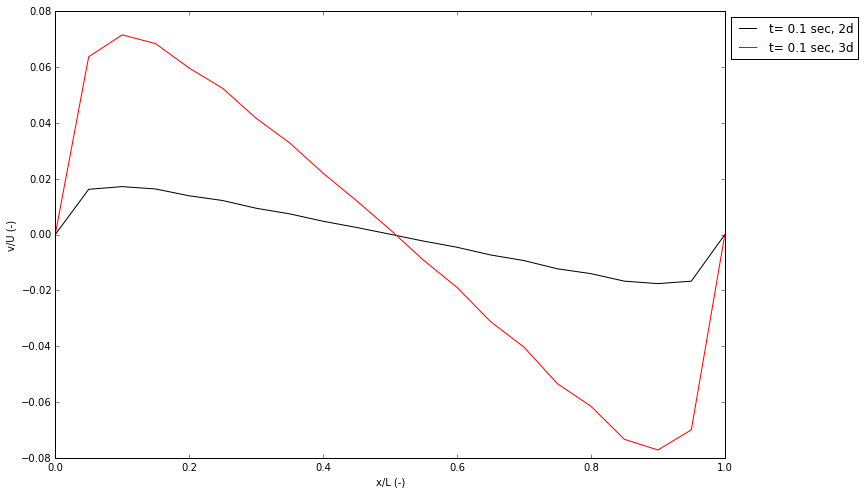

In [66]:
plot_v_vs_x(v01, v00, x00)

## What has happened here?

* Although a good comparison was obtained for the 2D data, the 3D data is almost completely unstable
* It is known that the central difference scheme can cause unstable behaviour of the non-linear advection term, whether the formulation is conservative or non-conservative.
* Perhaps a numerical scheme which solves the Riemann problem in each computational cell in each pseudo timestep/real timestep could be expected to perform better - see Konoszy and Drikakis (2014)